In [1]:
import numpy as np

from utils.loadData import loadData
from lstm.preprocessing import getDatasets, normalizeAtOnce
from lstm.model import getModel, evaluateFinal
from lstm.visualization import show_batch, show_data_simple

In [2]:
df = loadData()

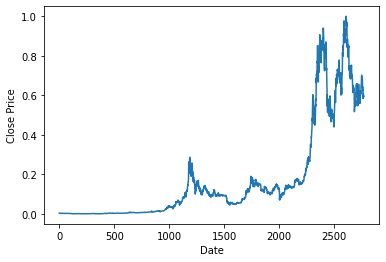

In [3]:
features = np.array(df["Close"]).reshape(-1, 1)
normalized_data, scaler = normalizeAtOnce(features)
show_data_simple(normalized_data)

2022-04-20 14:26:33.210144: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


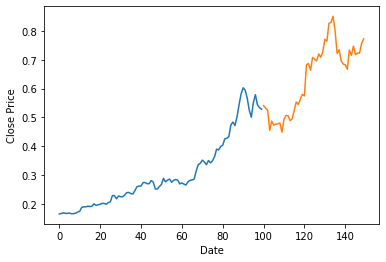

Input shape: (128, 100, 1)
Target shape: (128, 1)


In [4]:
config = {
    "past": 100, # try 10, 50, 100, 300
    "future": 50, # try 5, 50, 100
    "batch_size": 128, # large batches allow faster training
    "epochs": 10,
}

dataset_train, dataset_val, x_test, y_test = getDatasets(config, normalized_data)


for batch in dataset_val.take(1):
    inputs, targets = batch
    show_batch(inputs[0], targets[:config["future"]], config["past"])

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

In [5]:
evaluateFinal(getModel, dataset_train, dataset_val, config, "basic_regression")

Training Started...
Iterations:
1
2
3
4
5
6
7
8
9
10
Done
